In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Batang')

## 서울시 데이터 종합

In [2]:
df = pd.read_csv("서울시_데이터종합(연면적sum,거주인구).csv", encoding = 'cp949')

In [3]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [4]:
df = df.set_index(['대여소번호'])

In [5]:
df.head()

,일별평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
대여소번호,,,,,,,,,,,,,,,,
502.0,534.895890,0.0,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640
207.0,489.505479,0.0,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445
583.0,346.080822,0.0,1932.80,0.00,0.0,4184.18,0.0,59977.04,0.00,233.562697,1087.731522,197.716089,47.019980,0.571429,30156,520.130672
3533.0,239.726027,0.0,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995
152.0,2411.377551,0.0,954.10,0.00,0.0,0.00,0.0,30110.49,0.00,99.606355,2534.786324,899.273615,53.992085,0.500000,21319,739.718938


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1511 entries, 502.0 to 3543.0
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   일별평균이용량       1511 non-null   float64
 1   교육시설_sum      1511 non-null   float64
 2   근린생활시설_sum    1511 non-null   float64
 3   문화시설_sum      1511 non-null   float64
 4   숙박시설_sum      1511 non-null   float64
 5   업무시설_sum      1511 non-null   float64
 6   의료시설_sum      1511 non-null   float64
 7   주거시설_sum      1511 non-null   float64
 8   판매시설_sum      1511 non-null   float64
 9   공원_distance   1511 non-null   float64
 10  대학교_distance  1511 non-null   float64
 11  지하철_distance  1511 non-null   float64
 12  버스_distance   1511 non-null   float64
 13  경사도_mean      1511 non-null   float64
 14  거주인구          1511 non-null   int64  
 15  도로길이          1511 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 200.7 KB


In [7]:
df.describe()

,일별평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,64.499487,3703.317179,10231.422292,740.207337,1181.719228,16617.846924,843.305361,23282.268577,4236.866915,290.507978,1869.143428,522.056676,76.268730,2.033848,22276.154864,676.480077
std,153.964565,9557.017770,16743.481468,6035.330154,7115.413787,40059.990546,4486.223177,36583.972432,21677.918706,233.167954,1219.544643,492.819694,66.958174,1.972288,11954.836920,333.270412
min,0.950685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.671952,35.849532,8.101798,4.160543,0.000000,823.000000,0.000000
25%,24.070548,0.000000,913.830000,0.000000,0.000000,0.000000,0.000000,1814.575000,0.000000,149.545257,892.127890,189.383704,32.378032,0.500000,13581.000000,395.955561
50%,42.406849,0.000000,6374.370000,0.000000,0.000000,906.600000,0.000000,13832.340000,0.000000,237.555686,1573.733796,429.951657,56.714421,1.500000,20344.000000,650.377911
75%,70.402740,2533.030000,15159.910000,0.000000,0.000000,12548.350000,0.000000,31744.140000,0.000000,358.533832,2691.581390,686.657498,98.317197,2.800000,28989.000000,906.846526
max,3648.250000,97224.140000,290322.233100,165703.130000,138776.470000,446815.310000,85686.680000,703906.740000,340913.780000,1962.137084,6782.377213,4204.445392,557.954108,13.750000,80847.000000,2098.452944


## 왜도(skew) / 첨도(kurtosis)

**왜도(skewness)**
- 분포의 비대칭도
    - -2 < 왜도 < 2 - 정규분포
    - 왜도 > 2 - 왼쪽으로 치우침
    - 왜도 < -2 - 오른쪽으로 치우침
    
- Skewed 데이터를 변환하는 이유는 꼬리에 있는 값을 모델에 제대로 학습시키기 위함이다.
    
**첨도(kurtosis)**
- 확률분포의 뾰족한 정도
     - 첨도 = 0 (Pearson 첨도 = 3) - 정규분포
     - 첨도 > 0 (Pearson 첨도 > 3) - 위로 뾰족함
     - 첨도 < 0 (Pearson 첨도 < 3) - 아래로 뾰족함

In [8]:
from scipy.stats import skew

features_index = df.dtypes[df.dtypes != 'object'].index
skew_features = df[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 2]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum        18.061679
일별평균이용량         15.601694
숙박시설_sum        11.834449
의료시설_sum        10.540441
근린생활시설_sum       9.257959
판매시설_sum         9.018697
주거시설_sum         7.114418
교육시설_sum         4.594327
업무시설_sum         4.430314
지하철_distance     2.944671
공원_distance      2.902793
버스_distance      2.494466
dtype: float64


**log변환**

In [9]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])
df

,일별평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
대여소번호,,,,,,,,,,,,,,,,
502.0,6.283940,0.000000,0.000000,0.000000,0.0,6.810804,0.0,11.831935,0.000000,4.930944,1430.131460,4.040821,4.097812,0.500000,24085,714.440640
207.0,6.195436,0.000000,5.092092,0.000000,0.0,0.000000,0.0,11.039396,0.000000,5.351727,2254.225628,4.290482,3.473748,1.000000,15710,356.416445
583.0,5.849558,0.000000,7.567242,0.000000,0.0,8.339305,0.0,11.001734,0.000000,5.457723,1087.731522,5.291877,3.871617,0.571429,30156,520.130672
3533.0,5.483659,0.000000,8.659472,8.454994,0.0,0.000000,0.0,7.050461,11.412336,5.092176,639.201940,5.175335,3.781491,0.000000,43626,549.726995
152.0,7.788368,0.000000,6.861816,0.000000,0.0,0.000000,0.0,10.312662,0.000000,4.611215,2534.786324,6.802699,4.007189,0.500000,21319,739.718938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287.0,0.668181,0.000000,8.250980,0.000000,0.0,0.000000,0.0,8.465902,0.000000,5.236975,5396.477786,8.152100,5.610680,7.444444,8164,749.655227
2391.0,0.739325,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.148156,0.000000,5.907343,4119.802431,7.096272,4.982320,4.500000,14769,345.607938
465.0,1.710761,0.000000,8.834203,0.000000,0.0,0.000000,0.0,6.269797,0.000000,5.936502,301.960064,7.128330,5.128912,6.250000,1224,424.978106


**MinMaxScaler** 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=list(df.index.values))

In [11]:
df_scaled

,일별평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
502.0,0.745379,0.000000,0.000000,0.00000,0.0,0.523509,0.0,0.878757,0.000000,0.598248,0.206667,0.298639,0.524388,0.036364,0.290688,0.340461
207.0,0.733632,0.000000,0.404817,0.00000,0.0,0.000000,0.0,0.819895,0.000000,0.662008,0.328817,0.339329,0.391184,0.072727,0.186032,0.169847
583.0,0.687724,0.000000,0.601589,0.00000,0.0,0.640997,0.0,0.817098,0.000000,0.678070,0.155915,0.502538,0.476107,0.041558,0.366553,0.247864
3533.0,0.639158,0.000000,0.688421,0.70353,0.0,0.000000,0.0,0.523637,0.895831,0.622679,0.089432,0.483544,0.456870,0.000000,0.534877,0.261968
152.0,0.945062,0.000000,0.545509,0.00000,0.0,0.000000,0.0,0.765921,0.000000,0.549801,0.370403,0.748774,0.505045,0.036364,0.256123,0.352507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287.0,0.000000,0.000000,0.655946,0.00000,0.0,0.000000,0.0,0.628762,0.000000,0.644620,0.794576,0.968702,0.847304,0.541414,0.091735,0.357242
2391.0,0.009443,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.605163,0.000000,0.746199,0.605341,0.796621,0.713182,0.327273,0.174273,0.164697
465.0,0.138382,0.000000,0.702312,0.00000,0.0,0.000000,0.0,0.465657,0.000000,0.750617,0.039444,0.801846,0.744472,0.454545,0.005011,0.202520
2394.0,0.257674,0.000000,0.493741,0.00000,0.0,0.000000,0.0,0.750406,0.650526,0.755913,0.535332,0.751173,0.591346,0.072727,0.174273,0.122362


In [12]:
from scipy.stats import skew

features_index = df_scaled.dtypes[df_scaled.dtypes != 'object'].index
skew_features = df_scaled[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 2]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum    3.208102
의료시설_sum    2.692338
숙박시설_sum    2.182593
판매시설_sum    2.143577
dtype: float64


## 다중회귀분석

- statsmodels

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
#OLS검정
ols = smf.ols(formula = '일별평균이용량 ~ 교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data = df_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                일별평균이용량   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     41.39
Date:                Sun, 05 Sep 2021   Prob (F-statistic):          1.62e-101
Time:                        02:00:43   Log-Likelihood:                 1409.3
No. Observations:                1511   AIC:                            -2787.
Df Residuals:                    1495   BIC:                            -2702.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4812      0.023     20.617      0.000       0.435       0.527
교육시설_sum        -0.0044      0.007     -0.634      0.526      -0.018       0.009
근린생활시설_sum       0.0087      0.012      0.726      0.468      -0.015       0.032
문화시설_sum         0.0249      0.013      1.850      0.065      -0.002       0.051
숙박시설_sum        -0.0126      0.011     -1.125      0.261      -0.035       0.009
업무시설_sum         0.0377      0.007      5.041      0.000       0.023       0.052
의료시설_sum        -0.0316      0.011     -2.844      0.005      -0.053      -0.010
주거시설_sum         0.0037      0.010      0.368      0.713      -0.016       0.024
판매시설_sum         0.0155      0.010      1.559      0.119      -0.004       0.035
공원_distance      0.0020      0.022      0.092      0.927      -0.042       0.046
대학교_distance    -0.0840      0.015     -5.756      0.000      -0.113      -0.055
지하철_distance    -0.0871      0.016     -5.447      0.000      -0.118      -0.056
버스_distance     -0.0109      0.015     -0.726      0.468      -0.040       0.019
경사도_mean        -0.3148      0.018    -17.573      0.000      -0.350      -0.280
거주인구             0.0655      0.017      3.869      0.000       0.032       0.099
도로길이             0.0422      0.020      2.131      0.033       0.003       0.081
==============================================================================
Omnibus:                      261.296   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1070.728
Skew:                           0.779   Prob(JB):                    3.12e-233
Kurtosis:                       6.819   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**회귀분석 결과**
- Adj. R-squared: 0.286
    - 회귀모형의 설명력 약 28%
    - F-statistic: 41.39
    - Prob (F-statistic):1.62e-101
    - 통계적으로 유의한 모형  
- 교육시설_sum / 근린생활시설_sum / 숙박시설_sum / 주거시설_sum / 판매시설_sum / 공원_distance / 버스_distance 의 p-value 값이 유의X

**다중공선성 검사**
- 다중회귀분석을 하는데 사용한 독립변수들의 VIF값이 모두 10이하로 다중공선성에 문제는 없다

In [15]:
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
y, X = dmatrices('일별평균이용량 ~ 교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data=df_scaled, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,89.8,Intercept
1,1.0,교육시설_sum
2,1.9,근린생활시설_sum
3,1.1,문화시설_sum
4,1.2,숙박시설_sum
5,1.3,업무시설_sum
6,1.1,의료시설_sum
7,1.4,주거시설_sum
8,1.1,판매시설_sum
9,1.1,공원_distance


## 유의하지 않은 변수 제거 후 회귀분석

In [17]:
ols2 = smf.ols(formula = '일별평균이용량 ~ 문화시설_sum + 업무시설_sum + 의료시설_sum + 대학교_distance + 지하철_distance  + 경사도_mean + 거주인구 + 도로길이', data = df_scaled)
result2 = ols2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                일별평균이용량   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     76.94
Date:                Sun, 05 Sep 2021   Prob (F-statistic):          1.70e-106
Time:                        02:00:43   Log-Likelihood:                 1406.4
No. Observations:                1511   AIC:                            -2795.
Df Residuals:                    1502   BIC:                            -2747.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4830      0.013     36.015      0.000       0.457       0.509
문화시설_sum         0.0221      0.013      1.661      0.097      -0.004       0.048
업무시설_sum         0.0382      0.007      5.412      0.000       0.024       0.052
의료시설_sum        -0.0311      0.011     -2.823      0.005      -0.053      -0.009
대학교_distance    -0.0833      0.014     -5.813      0.000      -0.111      -0.055
지하철_distance    -0.0907      0.016     -5.741      0.000      -0.122      -0.060
경사도_mean        -0.3163      0.018    -17.974      0.000      -0.351      -0.282
거주인구             0.0667      0.017      3.955      0.000       0.034       0.100
도로길이             0.0492      0.016      2.984      0.003       0.017       0.082
==============================================================================
Omnibus:                      251.481   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.921
Skew:                           0.753   Prob(JB):                    4.99e-220
Kurtosis:                       6.711   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- scikit-learn 

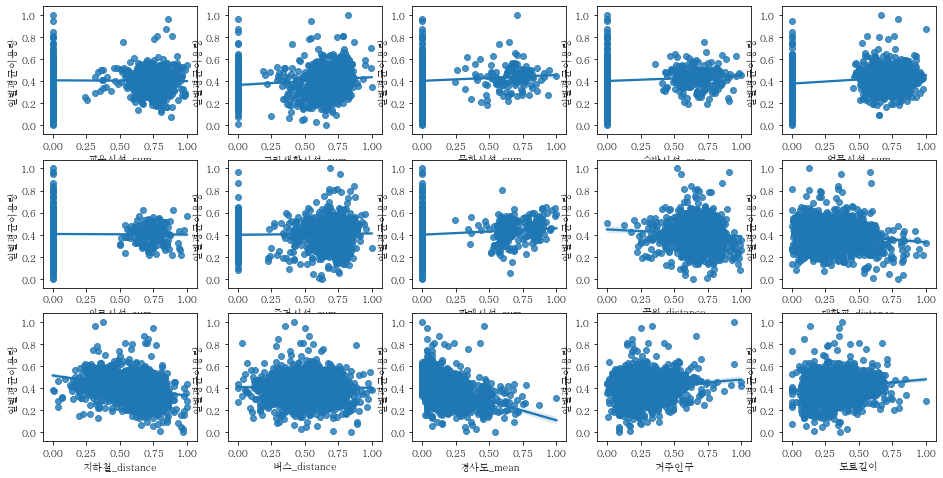

In [18]:
fig,axs = plt.subplots(figsize=(16,8), ncols=5,nrows=3)
lm_features = ['교육시설_sum','근린생활시설_sum','문화시설_sum','숙박시설_sum','업무시설_sum','의료시설_sum',
               '주거시설_sum','판매시설_sum','공원_distance','대학교_distance','지하철_distance','버스_distance','경사도_mean','거주인구','도로길이']
for i, features in enumerate(lm_features):
    row = int(i/5)
    col = i%5
    sns.regplot(x=features, y='일별평균이용량', data=df_scaled, ax=axs[row][col])

In [32]:
from sklearn.model_selection import train_test_split

y_target = df_scaled['일별평균이용량']
X_features = df_scaled.drop('일별평균이용량', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regr(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('MSE 값: {0:.3f}, RMSE 값: {1:.3f}, MAE 값: {2:.3f}, R2 값: {3:.3f}'.format(mse,rmse,mae,r2))

In [34]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [35]:
get_model_predict(lr, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
MSE 값: 0.022, RMSE 값: 0.148, MAE 값: 0.107, R2 값: 0.292


In [22]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', lr.coef_)

절편 값: 0.4660728874148786
회귀 계수값: [-0.00553259  0.00348073  0.02462471 -0.00611466  0.03990358 -0.03241477
 -0.00132804  0.01223727  0.01594174 -0.0726582  -0.08685091 -0.01373923
 -0.29965635  0.07348746  0.05888238]


In [23]:
coeff = pd.Series(data = lr.coef_, index = X_features.columns)
coeff

교육시설_sum       -0.005533
근린생활시설_sum      0.003481
문화시설_sum        0.024625
숙박시설_sum       -0.006115
업무시설_sum        0.039904
의료시설_sum       -0.032415
주거시설_sum       -0.001328
판매시설_sum        0.012237
공원_distance     0.015942
대학교_distance   -0.072658
지하철_distance   -0.086851
버스_distance    -0.013739
경사도_mean       -0.299656
거주인구            0.073487
도로길이            0.058882
dtype: float64

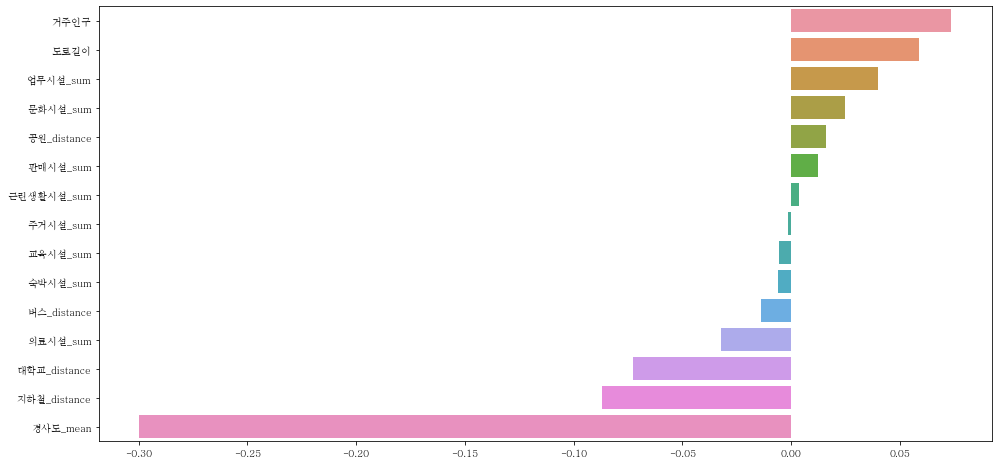

In [24]:
coef = pd.Series(lr.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

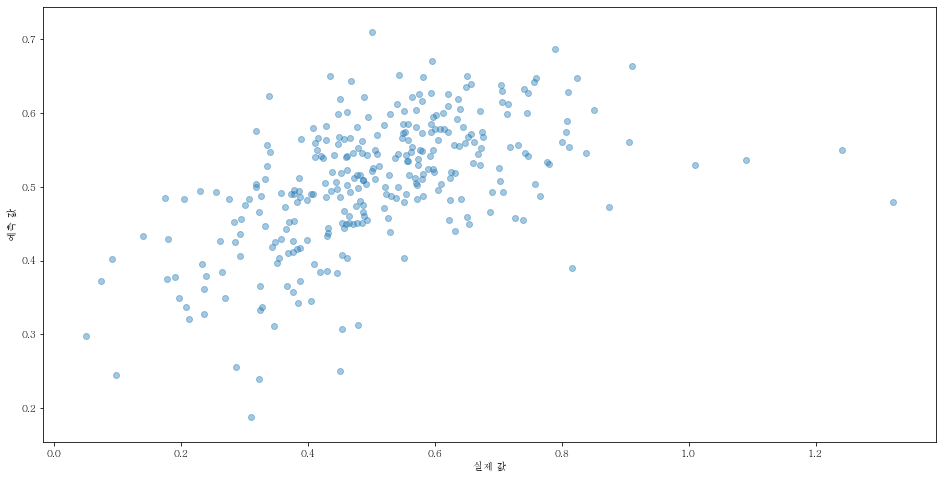

In [25]:
plt.scatter(y_test, y_preds, alpha=0.4)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

## 릿지/라쏘 회귀

In [37]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
lasso = Lasso()
lr = LinearRegression()

for model in [lr, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
MSE 값: 0.022, RMSE 값: 0.148, MAE 값: 0.107, R2 값: 0.292
### Ridge ###
MSE 값: 0.022, RMSE 값: 0.148, MAE 값: 0.107, R2 값: 0.290
### Lasso ###
MSE 값: 0.031, RMSE 값: 0.176, MAE 값: 0.134, R2 값: -0.002


In [43]:
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge, ridge_params)
print_best_params(lasso, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값:0.1178, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV시 최적 평균 RMSE 값:0.1218, 최적 alpha:{'alpha': 0.001}


In [44]:
from sklearn.linear_model import Ridge, Lasso

ridge_cv = Ridge(alpha=0.05)
lasso_cv = Lasso(alpha=0.001)
lr = LinearRegression()

for model in [lr, ridge_cv, lasso_cv]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
MSE 값: 0.022, RMSE 값: 0.148, MAE 값: 0.107, R2 값: 0.292
### Ridge ###
MSE 값: 0.022, RMSE 값: 0.148, MAE 값: 0.107, R2 값: 0.292
### Lasso ###
MSE 값: 0.022, RMSE 값: 0.150, MAE 값: 0.109, R2 값: 0.275


In [47]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


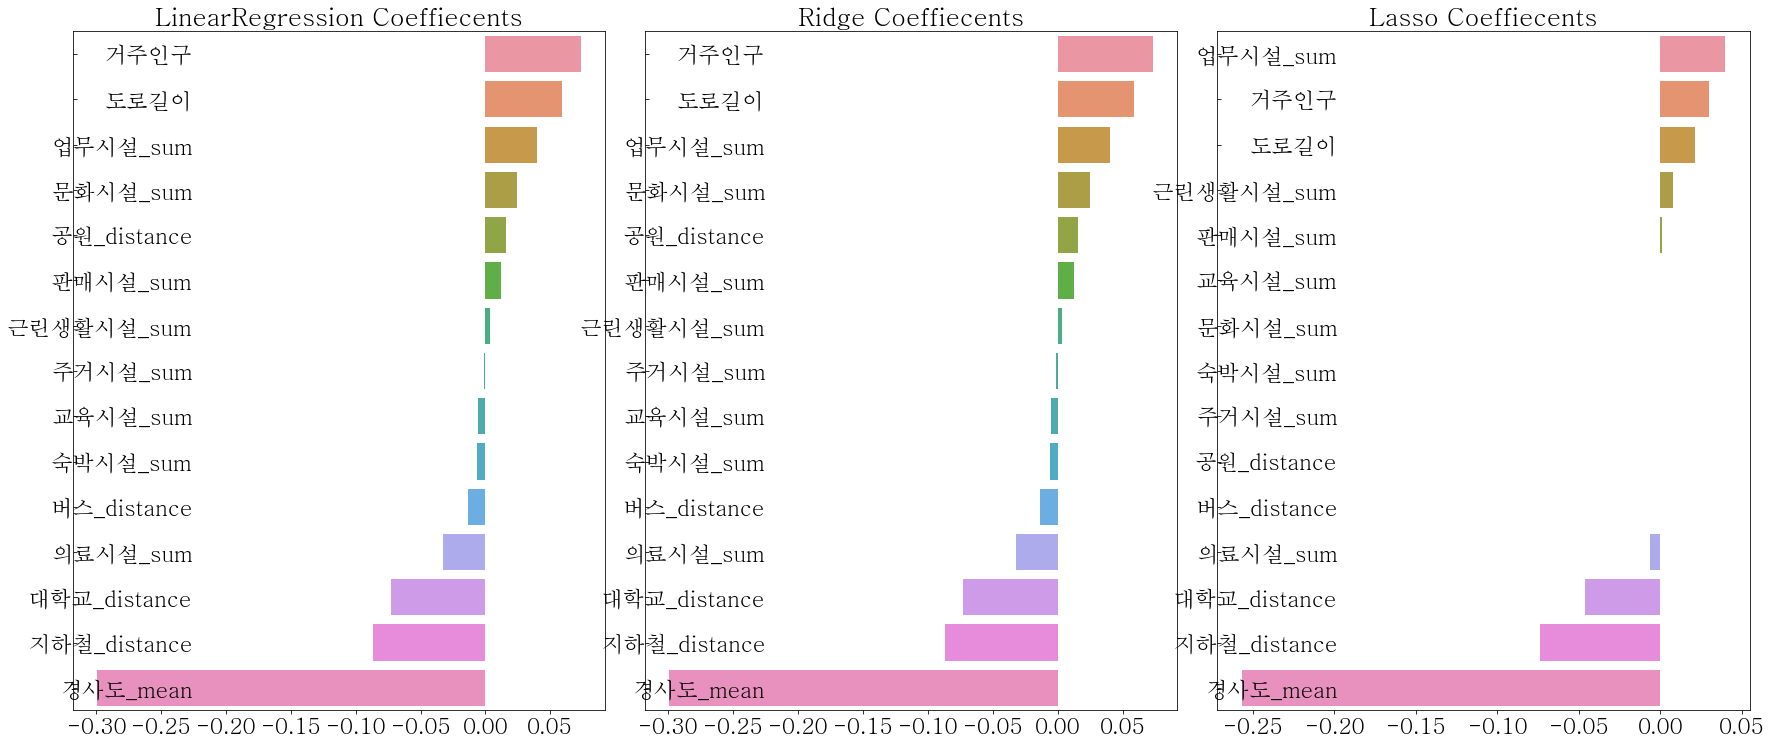

In [48]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr, ridge_cv, lasso_cv]
visualize_coefficient(models)

## 회귀 트리

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
xgb = XGBRegressor(objective='reg:squarederror')
lgbm = LGBMRegressor()

for model in [rf, gbm, xgb, lgbm]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
MSE 값: 0.021, RMSE 값: 0.145, MAE 값: 0.105, R2 값: 0.320
### GradientBoostingRegressor ###
MSE 값: 0.021, RMSE 값: 0.145, MAE 값: 0.105, R2 값: 0.320
### XGBRegressor ###
MSE 값: 0.021, RMSE 값: 0.143, MAE 값: 0.103, R2 값: 0.338
### LGBMRegressor ###
MSE 값: 0.022, RMSE 값: 0.147, MAE 값: 0.108, R2 값: 0.305


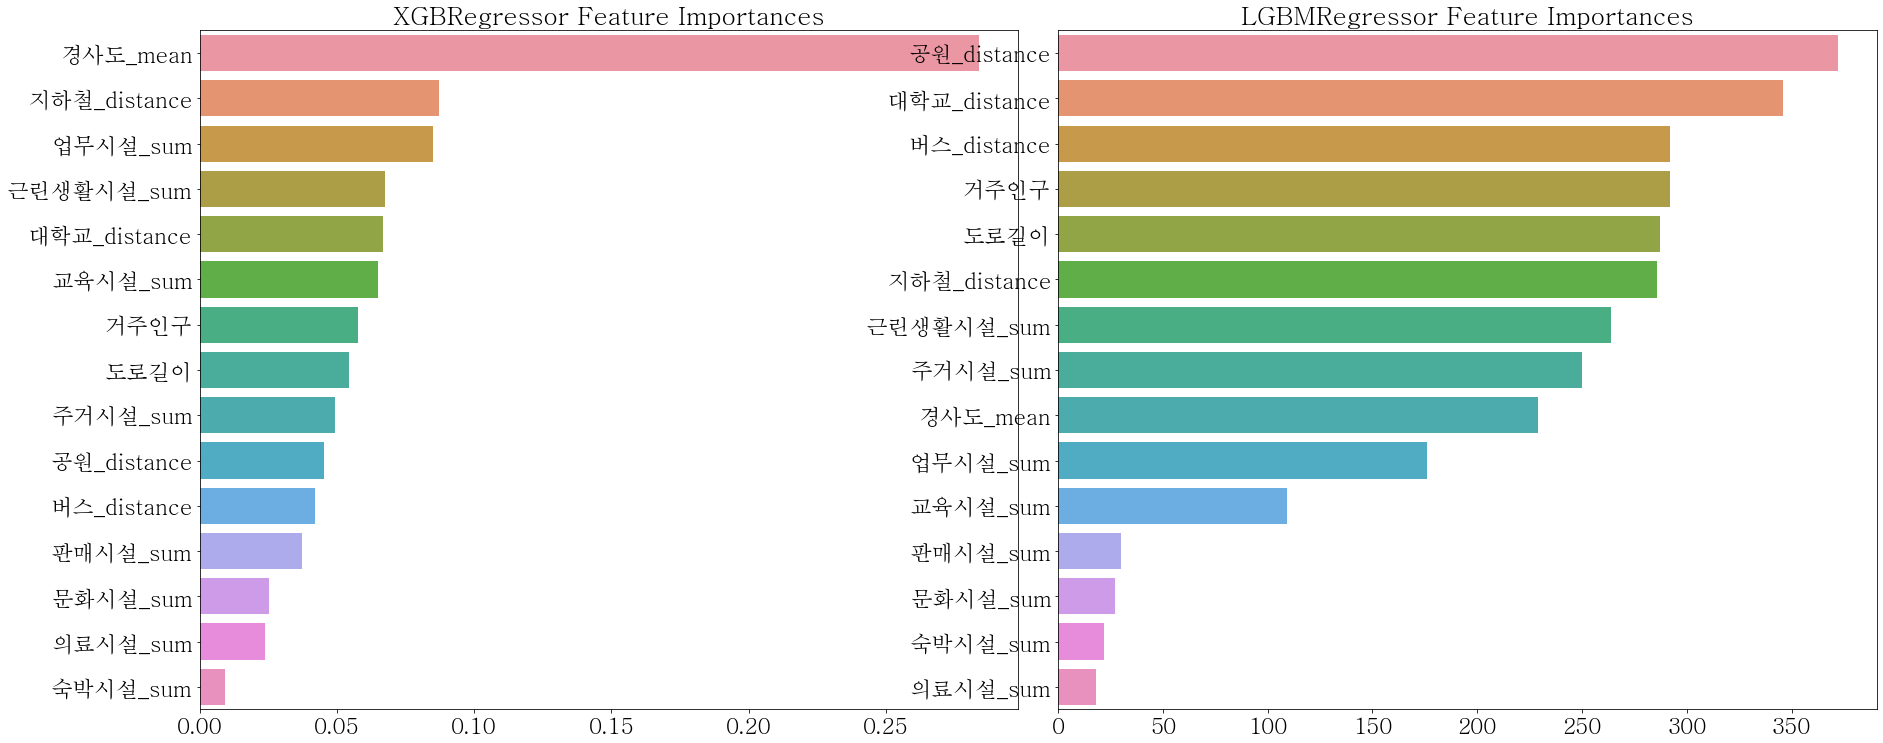

In [54]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [rf, gbm,xgb,lgbm]
visualize_ftr_importances(models)

In [55]:
lgbm_params = {'max_depth':[10,7,5,3,1],'num_leaves':[64,32,16,8,4,2],'min_child_samples':[20,15,10,5,3,1]}
best_lgbm = print_best_params(lgbm, lgbm_params)

LGBMRegressor 5 CV시 최적 평균 RMSE 값:0.1167, 최적 alpha:{'max_depth': 5, 'min_child_samples': 5, 'num_leaves': 16}


In [56]:
rf_params = {'max_depth': [6,8,10,12],'min_samples_leaf': [3,5,7,10],'min_samples_split': [2,3,5,10]}
best_rf = print_best_params(rf, rf_params)

RandomForestRegressor 5 CV시 최적 평균 RMSE 값:0.1182, 최적 alpha:{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [57]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_cv = RandomForestRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=5)
gbm_cv = GradientBoostingRegressor()
xgb_cv = XGBRegressor(objective='reg:squarederror')
lgbm_cv = LGBMRegressor(max_depth=5, min_child_samples=5, num_leaves=16)

for model in [rf_cv, gbm_cv, xgb_cv, lgbm_cv]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
MSE 값: 0.021, RMSE 값: 0.146, MAE 값: 0.106, R2 값: 0.311
### GradientBoostingRegressor ###
MSE 값: 0.021, RMSE 값: 0.145, MAE 값: 0.105, R2 값: 0.320
### XGBRegressor ###
MSE 값: 0.021, RMSE 값: 0.143, MAE 값: 0.103, R2 값: 0.338
### LGBMRegressor ###
MSE 값: 0.020, RMSE 값: 0.143, MAE 값: 0.104, R2 값: 0.343


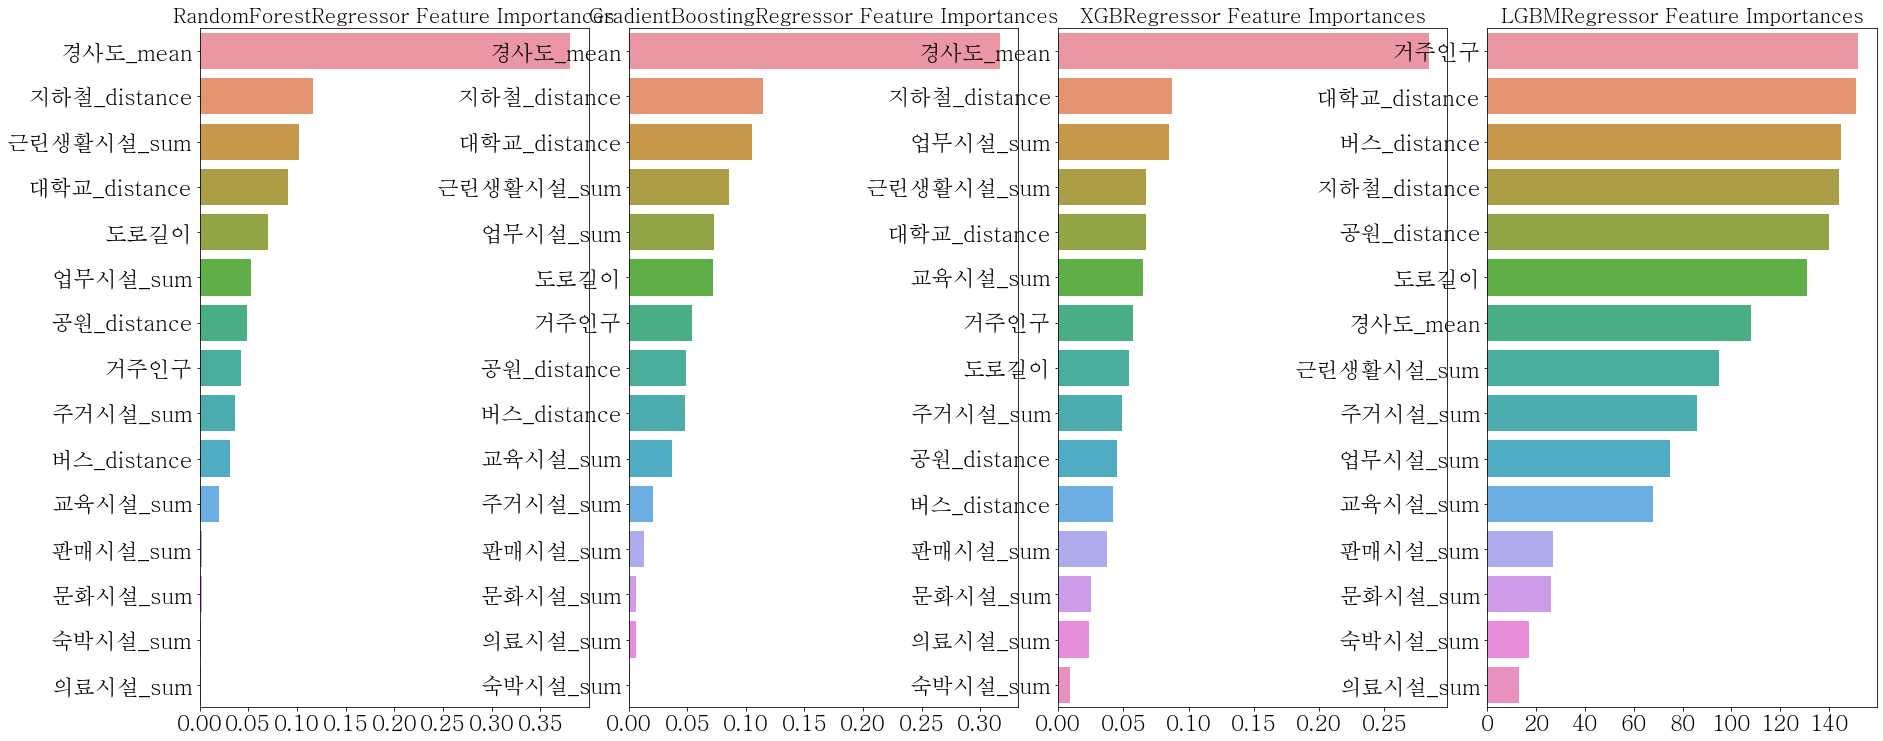

In [61]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=4)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=20)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [rf_cv, gbm_cv, xgb_cv, lgbm_cv]
visualize_ftr_importances(models)

In [62]:
get_top_features(lgbm_cv)

거주인구            152
대학교_distance    151
버스_distance     145
지하철_distance    144
공원_distance     140
도로길이            131
경사도_mean        108
근린생활시설_sum       95
주거시설_sum         86
업무시설_sum         75
교육시설_sum         68
판매시설_sum         27
문화시설_sum         26
숙박시설_sum         17
의료시설_sum         13
dtype: int32